In [5]:
import torch
import numpy as np
from models import SINKHORN, semi_dual
import json
from tqdm import tqdm
from scipy.optimize import minimize
torch.manual_seed(0)
np.random.seed(0)

dtype = torch.float

d = 1
eps_range = [0.5, 0.1, 0.05, 0.01, 0.005]
reg = 1e-3

n = 1000

# Define transport map
def transport_map(x):
    return x + 1/(6.0 - np.cos(np.pi*6*x)) - 0.2

def inv_map(x):
    y = np.random.rand(x.shape)
    for _ in range(50):
        deriv = 1 - (6*np.pi*np.sin(6*np.pi*y))/(6 - np.cos(6*np.pi*y))**2
        y -= (transport_map(y) - x)/deriv
    return y

pot_list = []
sd_list = []

# Generate source
mu_train = np.random.rand(n*d).reshape(n, d)
mu_test = np.random.rand(n*d).reshape(n, d)

# Generate target
nu_train = transport_map(np.random.rand(n*d).reshape(n, d))
nu_test = transport_map(np.random.rand(n*d).reshape(n, d))

for eps in eps_range:

    key = 'Epsilon = {}'.format(eps)
    print(key)
    print('\n')
    
    # Instantiate Sinkhorn model
    sinkhorn = SINKHORN(torch.tensor(mu_train, dtype=dtype).contiguous(),
                        torch.tensor(nu_train, dtype=dtype).contiguous(), eps)
    # Solve dual 
    sinkhorn.solve_dual(T=10000000, tol=1e-5)
    
    pot_list.append(sinkhorn)

    # Compute test semi dual
    f = lambda x: sinkhorn.f(x) + (reg/2)*(x**2).sum(-1)
    grad_f = lambda x: sinkhorn.grad_f(x) + reg*x
    hess_f = lambda x: sinkhorn.hess_f(x) + reg*torch.eye(d)[None, :]

    semi_dual_test = semi_dual(torch.tensor(mu_test, dtype=dtype).contiguous(),
                               torch.tensor(nu_test, dtype=dtype).contiguous(), f, grad_f, 100.0, hess_f,
                               T=1000000)
    print('Semi Dual test: {}'.format(semi_dual_test))
    sd_list.append(semi_dual_test)

Solving dual ...:   0%|          | 0/10000000 [00:00<?, ?it/s]

Epsilon = 0.5


Compiling libKeOpstorch916638a784 in /Users/litlboy/.cache/pykeops-1.4-cpython-37/build-libKeOpstorch916638a784:
       formula: Max_SumShiftExp_Reduction((((Var(0,1,1) - (Sum(Square((Var(1,1,0) - Var(2,1,1)))) / IntCst(2))) / Var(3,1,2)) - Var(4,1,2)),0)
       aliases: Var(0,1,1); Var(1,1,0); Var(2,1,1); Var(3,1,2); Var(4,1,2); 
       dtype  : float32
... Done.
Compiling libKeOpstorch5f2b89ff51 in /Users/litlboy/.cache/pykeops-1.4-cpython-37/build-libKeOpstorch5f2b89ff51:
       formula: Max_SumShiftExp_Reduction((((Var(0,1,0) - (Sum(Square((Var(1,1,0) - Var(2,1,1)))) / IntCst(2))) / Var(3,1,2)) - Var(4,1,2)),1)
       aliases: Var(0,1,0); Var(1,1,0); Var(2,1,1); Var(3,1,2); Var(4,1,2); 
       dtype  : float32
... Done.


Solving dual ...:   0%|          | 3/10000000 [01:22<160631:29:24, 57.83s/it]

Optim terminated
Compiling libKeOpstorch31fcf78337 in /Users/litlboy/.cache/pykeops-1.4-cpython-37/build-libKeOpstorch31fcf78337:
       formula: Max_SumShiftExp_Reduction(((Sum((Var(0,1,0) * Var(1,1,1))) / Var(2,1,2)) + Var(3,1,1)),0)
       aliases: Var(0,1,0); Var(1,1,1); Var(2,1,2); Var(3,1,1); 
       dtype  : float32
... Done.



Computing conjugate ...:   0%|          | 0/1000000 [00:00<?, ?it/s]

Compiling libKeOpstorchd6e580d910 in /Users/litlboy/.cache/pykeops-1.4-cpython-37/build-libKeOpstorchd6e580d910:
       formula: Max_Reduction(((Sum((Var(0,1,0) * Var(1,1,1))) / Var(2,1,2)) + Var(3,1,1)),0)
       aliases: Var(0,1,0); Var(1,1,1); Var(2,1,2); Var(3,1,1); 
       dtype  : float32
... Done.
Compiling libKeOpstorch04b3bb8230 in /Users/litlboy/.cache/pykeops-1.4-cpython-37/build-libKeOpstorch04b3bb8230:
       formula: Sum_Reduction((Var(0,1,1) * Exp((((Sum((Var(1,1,0) * Var(0,1,1))) / Var(2,1,2)) + Var(3,1,1)) - Var(4,1,0)))),0)
       aliases: Var(0,1,1); Var(1,1,0); Var(2,1,2); Var(3,1,1); Var(4,1,0); 
       dtype  : float32
... Done.
Compiling libKeOpstorchf3c7751d5d in /Users/litlboy/.cache/pykeops-1.4-cpython-37/build-libKeOpstorchf3c7751d5d:
       formula: Sum_Reduction(Exp((((Sum((Var(0,1,0) * Var(1,1,1))) / Var(2,1,2)) + Var(3,1,1)) - Var(4,1,0))),0)
       aliases: Var(0,1,0); Var(1,1,1); Var(2,1,2); Var(3,1,1); Var(4,1,0); 
       dtype  : float32
... Done.
Com


Computing conjugate ...:   0%|          | 314/1000000 [02:24<2:22:24, 117.00it/s]

Solving dual ...:   0%|          | 0/10000000 [00:00<?, ?it/s]

Solving dual ...:   0%|          | 2/10000000 [00:00<169:26:25, 16.39it/s]

Semi Dual test: 0.5876811146736145
Epsilon = 0.1






Solving dual ...:   0%|          | 4/10000000 [00:00<174:36:38, 15.91it/s]

Solving dual ...:   0%|          | 6/10000000 [00:00<166:10:26, 16.72it/s]

Solving dual ...:   0%|          | 8/10000000 [00:00<180:47:58, 15.36it/s]


Computing conjugate ...:   0%|          | 0/1000000 [00:00<?, ?it/s]

Optim terminated




Computing conjugate ...:   0%|          | 2/1000000 [00:00<26:27:15, 10.50it/s]

Computing conjugate ...:   0%|          | 3/1000000 [00:00<28:28:38,  9.75it/s]

Computing conjugate ...:   0%|          | 4/1000000 [00:00<29:28:50,  9.42it/s]

Computing conjugate ...:   0%|          | 6/1000000 [00:00<27:41:18, 10.03it/s]

Computing conjugate ...:   0%|          | 8/1000000 [00:00<25:52:55, 10.73it/s]

Computing conjugate ...:   0%|          | 10/1000000 [00:00<23:50:08, 11.65it/s]

Computing conjugate ...:   0%|          | 12/1000000 [00:00<21:20:01, 13.02it/s]

Computing conjugate ...:   0%|          | 15/1000000 [00:01<18:26:48, 15.06it/s]

Computing conjugate ...:   0%|          | 18/1000000 [00:01<16:27:57, 16.87it/s]

Computing conjugate ...:   0%|          | 21/1000000 [00:01<14:32:03, 19.11it/s]

Computing conjugate ...:   0%|          | 25/1000000 [00:01<12:43:31, 21.83it/s]

Computing conjugate ...:   0%|          | 30/1000000 [00:01<10:51:10, 25.59it/s]

Computing conjugate

Semi Dual test: 0.3469959497451782
Epsilon = 0.05






Solving dual ...:   0%|          | 4/10000000 [00:00<166:08:22, 16.72it/s]

Solving dual ...:   0%|          | 6/10000000 [00:00<159:32:56, 17.41it/s]

Solving dual ...:   0%|          | 8/10000000 [00:00<157:34:30, 17.63it/s]

Solving dual ...:   0%|          | 10/10000000 [00:00<157:28:06, 17.64it/s]

Solving dual ...:   0%|          | 12/10000000 [00:00<155:05:50, 17.91it/s]

Solving dual ...:   0%|          | 14/10000000 [00:00<151:54:15, 18.29it/s]

Solving dual ...:   0%|          | 16/10000000 [00:00<173:01:55, 16.05it/s]


Computing conjugate ...:   0%|          | 0/1000000 [00:00<?, ?it/s]

Optim terminated




Computing conjugate ...:   0%|          | 2/1000000 [00:00<25:49:12, 10.76it/s]

Computing conjugate ...:   0%|          | 4/1000000 [00:00<25:05:47, 11.07it/s]

Computing conjugate ...:   0%|          | 6/1000000 [00:00<22:55:56, 12.11it/s]

Computing conjugate ...:   0%|          | 8/1000000 [00:00<20:15:57, 13.71it/s]

Computing conjugate ...:   0%|          | 11/1000000 [00:00<17:37:48, 15.76it/s]

Computing conjugate ...:   0%|          | 14/1000000 [00:00<15:34:45, 17.83it/s]

Computing conjugate ...:   0%|          | 18/1000000 [00:00<13:13:04, 21.01it/s]

Computing conjugate ...:   0%|          | 23/1000000 [00:01<11:13:19, 24.75it/s]

Computing conjugate ...:   0%|          | 30/1000000 [00:01<9:09:48, 30.31it/s] 

Computing conjugate ...:   0%|          | 38/1000000 [00:01<7:28:17, 37.18it/s]

Computing conjugate ...:   0%|          | 46/1000000 [00:01<6:18:14, 44.06it/s]

Computing conjugate ...:   0%|          | 56/1000000 [00:01<5:18:00, 52.41it/s]

Computing conjugate .

Semi Dual test: 0.32793086767196655
Epsilon = 0.01






Solving dual ...:   0%|          | 4/10000000 [00:00<153:02:57, 18.15it/s]

Solving dual ...:   0%|          | 6/10000000 [00:00<153:46:44, 18.06it/s]

Solving dual ...:   0%|          | 8/10000000 [00:00<155:55:02, 17.82it/s]

Solving dual ...:   0%|          | 10/10000000 [00:00<154:08:46, 18.02it/s]

Solving dual ...:   0%|          | 12/10000000 [00:00<150:16:47, 18.48it/s]

Solving dual ...:   0%|          | 14/10000000 [00:00<151:45:46, 18.30it/s]

Solving dual ...:   0%|          | 16/10000000 [00:00<151:35:20, 18.32it/s]

Solving dual ...:   0%|          | 18/10000000 [00:00<151:53:05, 18.29it/s]

Solving dual ...:   0%|          | 20/10000000 [00:01<150:45:52, 18.42it/s]

Solving dual ...:   0%|          | 22/10000000 [00:01<149:35:21, 18.57it/s]

Solving dual ...:   0%|          | 24/10000000 [00:01<146:39:40, 18.94it/s]

Solving dual ...:   0%|          | 26/10000000 [00:01<145:12:29, 19.13it/s]

Solving dual ...:   0%|          | 28/10000000 [00:01<148:44:45, 18.67it/s]



Optim terminated





Computing conjugate ...:   0%|          | 2/1000000 [00:00<26:24:26, 10.52it/s]


Computing conjugate ...:   0%|          | 3/1000000 [00:00<26:59:27, 10.29it/s]


Computing conjugate ...:   0%|          | 5/1000000 [00:00<24:03:43, 11.54it/s]


Computing conjugate ...:   0%|          | 11/1000000 [00:00<18:22:01, 15.12it/s]


Computing conjugate ...:   0%|          | 21/1000000 [00:00<9:34:40, 29.00it/s] 



Solving dual ...:   0%|          | 0/10000000 [00:00<?, ?it/s]


Solving dual ...:   0%|          | 2/10000000 [00:00<168:57:29, 16.44it/s]

Semi Dual test: 0.3187287449836731
Epsilon = 0.005







Solving dual ...:   0%|          | 4/10000000 [00:00<167:25:13, 16.59it/s]


Solving dual ...:   0%|          | 6/10000000 [00:00<160:04:02, 17.35it/s]


Solving dual ...:   0%|          | 8/10000000 [00:00<156:49:49, 17.71it/s]


Solving dual ...:   0%|          | 10/10000000 [00:00<155:18:03, 17.89it/s]


Solving dual ...:   0%|          | 12/10000000 [00:00<153:28:21, 18.10it/s]


Solving dual ...:   0%|          | 14/10000000 [00:00<155:42:33, 17.84it/s]


Solving dual ...:   0%|          | 16/10000000 [00:00<155:56:26, 17.81it/s]


Solving dual ...:   0%|          | 18/10000000 [00:01<152:47:49, 18.18it/s]


Solving dual ...:   0%|          | 20/10000000 [00:01<152:40:18, 18.19it/s]


Solving dual ...:   0%|          | 22/10000000 [00:01<152:20:23, 18.23it/s]


Solving dual ...:   0%|          | 24/10000000 [00:01<149:02:07, 18.64it/s]


Solving dual ...:   0%|          | 26/10000000 [00:01<146:21:13, 18.98it/s]


Solving dual ...:   0%|          | 28/10000000 [00:01<144:41:18,

Optim terminated






Computing conjugate ...:   0%|          | 2/1000000 [00:00<26:56:48, 10.31it/s]



Computing conjugate ...:   0%|          | 4/1000000 [00:00<25:56:10, 10.71it/s]



Computing conjugate ...:   0%|          | 7/1000000 [00:00<21:14:47, 13.07it/s]



Computing conjugate ...:   0%|          | 16/1000000 [00:00<10:23:46, 26.72it/s]

Semi Dual test: 0.3181489109992981





Solving dual ...:   0%|          | 86/10000000 [00:23<154:33:51, 17.97it/s]

In [7]:
import matplotlib.pyplot as plt

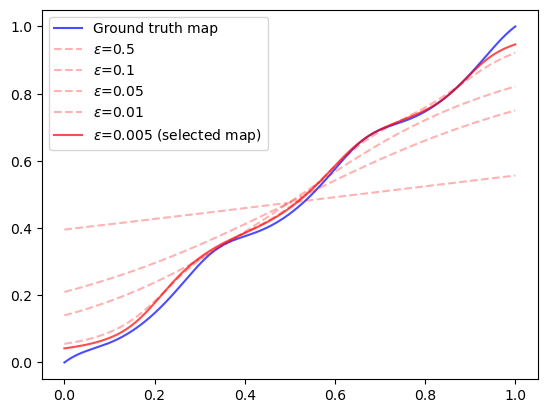

In [16]:
grid = np.linspace(0, 1, 500)[:, None]
plt.plot(grid, transport_map(grid), label='Ground truth map', color='b', alpha=0.7)
for i, (pot, eps) in enumerate(zip(pot_list, eps_range)):
    if i == np.array(sd_list).argmin():
        plt.plot(grid, pot.grad_f(torch.tensor(grid, dtype=dtype)), 
                 label=r'$\varepsilon$={} (selected map)'.format(eps_range[i]), 
                 color='r', alpha=0.7)
    else:
        plt.plot(grid, pot.grad_f(torch.tensor(grid, dtype=dtype)), 
                 label=r'$\varepsilon$={}'.format(eps_range[i]), linestyle ='--',
                 color='r', alpha=0.3)
plt.legend()
plt.show()

In [5]:
torch.linalg

AttributeError: module 'torch' has no attribute 'linalg'